# (☞ﾟヮﾟ)☞ Emoji Predictor ᕕ( ᐛ )ᕗ



Dataset psychExp

Il dataset iniziale è stato scaricato dal [GitHub repository DeepMoji](https://github.com/bfelbo/DeepMoji/tree/master/data), è di circa 7000 entry.

Il dataset psychExp è formato da un vettore con codifica One Hot che rappresenta le differenti emoji che andremo a predire: 
 
 - Joy 😂
 - Fear 😱
 - Anger 😠
 - Sadness 😢
 - Disgust 😒
 - Shame 😓
 - Guilt 😳

Il dataset è stato poi ampliato con altre 4000 entry grazie ai dataset presenti in [questo sito](http://saifmohammad.com/WebPages/EmotionIntensity-SharedTask.html), è stata fatta una pulizia tramite script bash per adattare il formato.


```bash
#!/bin/bash

function clean {

sed --regexp-extended "s/(^[0-9]{5})/$2/g" $1_raw | sed --regexp-extended "s/($1.*)//g" | sed --regexp-extended 's/(\&amp)|([ðŸ’˜©•âœ¨œŸ½¼ƒ§€™ˆ¤™€”¥»Œ¹ï¸™„¡‘Š¢—™Â£Ž­¿¾ž®ã‹])|(\&gt;)|(\\n)//g' > $1_clean

}

clean joy "[ 1.  0.  0.  0.  0.  0.  0.]"
clean fear "[ 0.  1.  0.  0.  0.  0.  0.]"
clean anger "[ 0.  0.  1.  0.  0.  0.  0.]"
clean sadness "[ 0.  0.  0.  1.  0.  0.  0.]"
```

### Caricare il dataset


In [1]:

from google.colab import files

uploaded = files.upload()
# print(uploaded)


Saving dataset.txt to dataset.txt


In [0]:
def read_file(file_name): 
    data_list  = []
    with open(file_name, 'r') as f: 
        for line in f: 
            line = line.strip() 
            label = ' '.join(line[1:line.find("]")].strip().split())
            text = line[line.find("]")+1:].strip()
            data_list.append([label, text])
    return data_list 

Il nome del file caricato deve essere specificato nella variabile `file_name`

In [0]:
file_name = "dataset.txt"
psychExp_txt= read_file(file_name)

In [4]:
print("Il numero delle istanze nel dataset è: {}".format(len(psychExp_txt)))

Il numero delle istanze nel dataset è: 51687


In [5]:
print("Data example: ")
print(psychExp_txt[0])

Data example: 
['1. 0. 0. 0. 0. 0. 0.', 'During the period of falling in love, each time that we met and especially when we had not met for a long time.']


### Features
Abbiamo scelto un n-gram compreso tra 1 e 4. Le feature includono la punteggiatura. Se il dato è un tweet contiene anche hash tags       

In [0]:
import re 
from collections import Counter

In [0]:
def ngram(token, n): 
    output = []
    for i in range(n-1, len(token)): 
        ngram = ' '.join(token[i-n+1:i+1])
        output.append(ngram) 
    return output

In [0]:
def create_feature(text, nrange=(1, 1)):
    text_features = [] 
    text = text.lower() 

    # 1. consideriamo i caratteri alfanumerici come token
    # Se il tweet contiene #, lo consideriamo come una feature
    # Estraggo gli n-grammi
    text_alphanum = re.sub('[^a-z0-9#]', ' ', text)
    for n in range(nrange[0], nrange[1]+1): 
        text_features += ngram(text_alphanum.split(), n)
    
    # 2. consideriamo la punteggiatura come token
    text_punc = re.sub('[a-z0-9]', ' ', text)
    text_features += ngram(text_punc.split(), 1)
    
    # 3. torniamo un dizionario dove le chiavi sono una lista di elementi 
    # e i loro valori sono il numero di volte che appaiono nel testo 
    return Counter(text_features)

In [9]:
print(create_feature("I love you!"))
print(create_feature(" aly wins the gold!!!!!!  #olympics"))
print(create_feature(" aly wins the gold!!!!!!  #olympics", (1, 2)))

Counter({'i': 1, 'love': 1, 'you': 1, '!': 1})
Counter({'aly': 1, 'wins': 1, 'the': 1, 'gold': 1, '#olympics': 1, '!!!!!!': 1, '#': 1})
Counter({'aly': 1, 'wins': 1, 'the': 1, 'gold': 1, '#olympics': 1, 'aly wins': 1, 'wins the': 1, 'the gold': 1, 'gold #olympics': 1, '!!!!!!': 1, '#': 1})


### **Convert the lables and Add features to text data**: 

In [0]:
def convert_label(item, name): 
    items = list(map(float, item.split()))
    label = ""
    for idx in range(len(items)): 
        if items[idx] == 1: 
            label += name[idx] + " "
    
    return label.strip()

In [0]:
emotions = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]

X_all = []
y_all = []
for label, text in psychExp_txt:
    y_all.append(convert_label(label, emotions))
    X_all.append(create_feature(text, nrange=(1, 4)))

In [12]:
print("features example: ")
print(X_all[0])

features example: 
Counter({'time': 2, 'we': 2, 'met': 2, 'during': 1, 'the': 1, 'period': 1, 'of': 1, 'falling': 1, 'in': 1, 'love': 1, 'each': 1, 'that': 1, 'and': 1, 'especially': 1, 'when': 1, 'had': 1, 'not': 1, 'for': 1, 'a': 1, 'long': 1, 'during the': 1, 'the period': 1, 'period of': 1, 'of falling': 1, 'falling in': 1, 'in love': 1, 'love each': 1, 'each time': 1, 'time that': 1, 'that we': 1, 'we met': 1, 'met and': 1, 'and especially': 1, 'especially when': 1, 'when we': 1, 'we had': 1, 'had not': 1, 'not met': 1, 'met for': 1, 'for a': 1, 'a long': 1, 'long time': 1, 'during the period': 1, 'the period of': 1, 'period of falling': 1, 'of falling in': 1, 'falling in love': 1, 'in love each': 1, 'love each time': 1, 'each time that': 1, 'time that we': 1, 'that we met': 1, 'we met and': 1, 'met and especially': 1, 'and especially when': 1, 'especially when we': 1, 'when we had': 1, 'we had not': 1, 'had not met': 1, 'not met for': 1, 'met for a': 1, 'for a long': 1, 'a long t

In [13]:
print("Label example:")
print(len(y_all))


Label example:
51687


**Data split**: I dati sono divisi 90-10, dove 90% per il training set e il 10% per il testing. Abbiamo scelto il 10% per essere sicuri di avere un numero sufficiente di dati per la parte di testing e limitare l'overfitting. Abbiamo usato `train_test_split` per splittare i dati. 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X_all, y_all, test_size = 0.1, random_state = 123)

**DictVectorizer**: Conversione delle caratteristiche etichettate in vettori sparsi.



In [0]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# **Classificatori**

Sono stati utilizzati i seguenti classificatori:
+ `SVC`
+ `LinearSVC`
+ `RandomForestClassifier`
+ `DecisionTreeClassifier`
+ `PassiveAggressiveClassifier`
+ `SGDClassifier`
+ `RidgeClassifier`
+ `RidgeClassifierCV`


In [0]:
from sklearn.metrics import accuracy_score

def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    
    # print("Training acc: {}".format(train_acc))
    # print("Test acc    : {}".format(test_acc))
    
    return train_acc, test_acc    

In [0]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier

# classificatori
svc = SVC(max_iter=5000, verbose=True)
lsvc = LinearSVC(random_state=123, max_iter=5000, verbose=True)
rforest = RandomForestClassifier(random_state=123, verbose=50)
dtree = DecisionTreeClassifier()
pa = PassiveAggressiveClassifier(C=1.0, fit_intercept=True, max_iter=1000, tol=0.001, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, shuffle=True, verbose=50, loss='hinge', n_jobs=None, random_state=None, warm_start=False, class_weight=None, average=False)
sgd = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=50, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
ridge = RidgeClassifier(alpha=1.0, fit_intercept=False, normalize=False, copy_X=True, max_iter=None, tol=0.001, class_weight=None, solver='saga')

clifs = [svc, lsvc, rforest, dtree, pa, sgd, ridge]

# train and test them 
print("| {:35} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
print("| {} | {} | {} |".format("-"*35, "-"*17, "-"*13))
for clf in clifs: 
    clf_name = clf.__class__.__name__
    
    train_acc, test_acc = train_test(clf, X_train, X_test, y_train, y_test)

    print("| {:35} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))

**Risultati**: L'accuratezza per il training e per il test di ogni classificatore sono riassunte nella tabella.


| Classifier                          | Training Accuracy | Test Accuracy |
| ----------------------------------- | ----------------- | ------------- |
| SVC                                 |         0.9249725 |     0.5054054 |
| LinearSVC                           |         0.9949915 |     0.6171171 |
| RandomForestClassifier              |         0.9949915 |     0.5585586 |
| DecisionTreeClassifier              |         0.9949915 |     0.5117117 |
| PassiveAggressiveClassifier         |         0.9949915 |     0.5819820 |
| SGDClassifier                       |         0.9942903 |     0.6324324 |
| RidgeClassifier                     |         0.9939898 |     0.6477477 |

Guardando i risultati, LinearSVC lavora bene, cosi come SGDClassifier, RidgeClassifier, in Ridge l'accuratezza è leggermente superiore rispetto agli altri classificatori. 

In generale possiamo notare che abbiamo sempre una training accuracy maggiore della test accuracy, abbiamo dell'overfitting.


Dal momento che RidgeClassifier sembra lavorare bene, abbiamo fatto un tuning dei parametri per minimizzare l'overfitting.


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

parameters={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}

ridge = RidgeClassifier(alpha=1.0, fit_intercept=False, normalize=False, copy_X=True, max_iter=None, tol=0.001, class_weight=None, solver='saga')
grid_obj = GridSearchCV(ridge, param_grid = parameters, cv=5)

grid_obj.fit(X_train, y_train)

print("Validation acc: {}".format(grid_obj.best_score_))
print("Training acc: {}".format(accuracy_score(y_train, grid_obj.predict(X_train))))
print("Test acc    : {}".format(accuracy_score(y_test, grid_obj.predict(X_test))))
print("Best parameter: {}".format(grid_obj.best_params_))

Validation acc: 0.6493401360280142
Training acc: 0.9739670665118879
Test acc    : 0.668988198877926
Best parameter: {'alpha': 0.2}


**Final model**

Sia 'sag' che 'saga' utilizzano la Stochastic Average Gradient Descent, ma 'saga' usa la versione imparziale e più flessibile. Entrambi i metodi usano una procedura iterativa e sono spesso più veloci di altri solvers quando il numero delle feature è elevato. 

Il modello finale ha avuto i seguenti risultati:


| Validation Accuracy | Training Accuracy  | Test Accuracy     | Best parameter     |
| --------------------| -----------------  |-------------------|-------------------|
| 0.6342794251497487  | 0.9936892717619954 | 0.6522522522522523| alpha = 2 |

Come ci aspettavamo, a causa delle dimensioni del dataset, l'accuracy non è alta, ma accettabile.

**Analisi degli errori**

In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, grid_obj.predict(X_test))
print(matrix)

[[ 346    3   43    5  114   65    0]
 [  11  192   11    6   42   14    0]
 [  37    6  591    1  259  152    0]
 [   4    0    4  218    9    2   94]
 [  30    2  135    4 1530  126    0]
 [  27    5  132    7  277  580    0]
 [   1    0    0   80    3    0    1]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


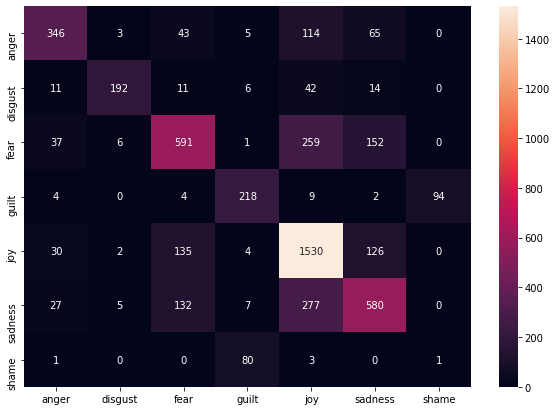

In [0]:
%matplotlib inline
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

l = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]
l.sort()
df_cm = pd.DataFrame(matrix, index = l, columns = l)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")
plt.show()

# Reference https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

In [0]:
# Get counts for each label
label_freq = {}
for label, _ in psychExp_txt: 
    label_freq[label] = label_freq.get(label, 0) + 1

# print the labels and their counts in sorted order 
for l in sorted(label_freq, key=label_freq.get, reverse=True):
    print("{:10}({})  {}".format(convert_label(l, emotions), l, label_freq[l]))

joy       (1. 0. 0. 0. 0. 0. 0.)  17641
fear      (0. 1. 0. 0. 0. 0. 0.)  10549
sadness   (0. 0. 0. 1. 0. 0. 0.)  10236
anger     (0. 0. 1. 0. 0. 0. 0.)  5816
guilt     (0. 0. 0. 0. 0. 0. 1.)  3391
disgust   (0. 0. 0. 0. 1. 0. 0.)  3009
shame     (0. 0. 0. 0. 0. 1. 0.)  1045


## **Test**

In [0]:
from sklearn.metrics import accuracy_score

emoji_dict = {"joy":"😂", "fear":"😱", "anger":"😠", "sadness":"😢", "disgust":"😒", "shame":"😓", "guilt":"😳"}

t1 = "At my Summer job a new caretaker had been employed who was my age."
t2 = "My car skidded on the wet street"
t3 = "My cat died"
t4 = "I was going to clean it when I found that the drum was full of mud and slime."
t5 = "We were friends, but I killed John."
t6 = "He's always full of mud and it's creepy"
t7 = "I just met him and he is very nice. We could become good friends"
t8 = "I knew him, he was my friend before arguing"

texts = [t1, t2, t3, t4, t5, t6, t7, t8]
for text in texts: 
    features = create_feature(text, nrange=(1, 4))
    features = vectorizer.transform(features)
    prediction = grid_obj.predict(features)
    sentiment = prediction[0]
    print("{} {}".format(emoji_dict[sentiment], text))

😳 At my Summer job a new caretaker had been employed who was my age.
😱 My car skidded on the wet street
😢 My cat died
😒 I was going to clean it when I found that the drum was full of mud and slime.
😢 We were friends, but I killed John.
😂 He's always full of mud and it's creepy
😂 I just met him and he is very nice. We could become good friends
😳 I knew him, he was my friend before arguing


### Future Work 

I risultati sui diversi classificatori sono sicuramente incoraggianti: possiamo affermare che con un dataset più ampio potremmo sicuramente avere overfitting migliore e quindi prestazioni migliori in termini di accuracy. 

La confusion matrix ci permette graficamente di vedere il numero di errori di classificazione e quali sono le emozioni che vengono confuse più spesso.


Non possiamo escludere che al crescere del dataset il classificatore che ottiene prestazioni migliori rimanga il RidgeClassifier.



# **Neural Netwok**


## **WordCloud**

In [0]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [0]:
# Get counts for each label
oneHotDict = {
    '1. 0. 0. 0. 0. 0. 0.': "joy", 
    '0. 1. 0. 0. 0. 0. 0.': "fear", 
    '0. 0. 1. 0. 0. 0. 0.': "anger", 
    '0. 0. 0. 1. 0. 0. 0.': "sadness", 
    '0. 0. 0. 0. 1. 0. 0.': "disgust", 
    '0. 0. 0. 0. 0. 1. 0.': "shame", 
    '0. 0. 0. 0. 0. 0. 1.': "guilt"
    }

label_freq = {}
for label, _ in psychExp_txt: 
    emoji = oneHotDict[label]
    label_freq[emoji] = []

for label, tweet in psychExp_txt: 
    emoji = oneHotDict[label]
    # TODO if none initialize 
    label_freq[emoji].append(tweet)

# print(label_freq)
print(label_freq["joy"])
print(label_freq["fear"])
# # print the labels and their counts in sorted order 
# for l in sorted(label_freq, key=label_freq.get, reverse=True):
#     print("{:10}({})  {}".format(convert_label(l, emotions), l, label_freq[l]))

Output hidden; open in https://colab.research.google.com to view.

In [0]:
l = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]
tweets = ''
for emotion in l:
  tweets = ''
  for tweet in label_freq[emotion]:
    tweets += ' '+tweet
  
  wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(tweets)
  plt.figure(figsize = (12, 8))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title(emotion.upper()+" tweets Wordcloud")

Output hidden; open in https://colab.research.google.com to view.

## **Model Selection**

In [0]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(100,100,100), (100,100,100,100,100), (100,)],
    'activation': ['logistic','tanh', 'relu'],
    'solver': ['lbfgs','sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(mlp, parameter_space, n_jobs=4, cv=3, verbose=10)
clf.fit(X_train, y_train)

In [0]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [0]:
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

## **Rete Neurale MLPClassifier**

In [0]:
from sklearn.neural_network import MLPClassifier

#mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001, solver='lbfgs', verbose=True,  random_state=21,tol=0.000000001)
#mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001, solver='sgd', verbose=True,  random_state=21,tol=0.000000001)
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001, solver='sgd', learning_rate='adaptive', activation='tanh', verbose=True,  random_state=21, tol=0.000000001)

mlp.fit(X_train, y_train)

In [0]:
prediction = mlp.predict(X_train)
nn_score = accuracy_score(y_train, prediction)
print("Training accuracy: {}".format(nn_score))
prediction = mlp.predict(X_test)
nn_score = accuracy_score(y_test, prediction)
print("Test accuracy: {}".format(nn_score))

KeyboardInterrupt: ignored

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import BernoulliRBM

# Set the parameters by cross-validation
tuned_parameters = [{'learning_rate': [0.06, 0.1], 'n_iter': [10], 'n_components': [128, 256, 512, 1024], 'verbose':[20]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        BernoulliRBM(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision

[BernoulliRBM] Iteration 1, pseudo-likelihood = -1358.47, time = 13055.03s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -795.56, time = 13073.10s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -251.26, time = 13104.91s


In [0]:
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn import linear_model, datasets, metrics

# Models we will use
logistic = linear_model.LogisticRegression(solver='newton-cg', tol=1)
rbm = BernoulliRBM(random_state=123, verbose=50)

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

# #############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 10
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 256
logistic.C = 6000

# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(X_train, y_train)

# Training the Logistic regression classifier directly on the pixel
raw_pixel_classifier = clone(logistic)
raw_pixel_classifier.C = 100.
raw_pixel_classifier.fit(X_train, y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -389.69, time = 30923.69s


In [20]:
prediction = raw_pixel_classifier.predict(X_train)
nn_score = accuracy_score(y_train, prediction)
print("Training accuracy: {}".format(nn_score))
prediction = raw_pixel_classifier.predict(X_test)
nn_score = accuracy_score(y_test, prediction)
print("Test accuracy: {}".format(nn_score))

NameError: ignored



### **Analisi degli errori**



In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, mlp.predict(X_test))
print(matrix)

In [0]:
%matplotlib inline
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

l = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]
l.sort()
df_cm = pd.DataFrame(matrix, index = l, columns = l)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="d")
plt.show()

# Reference https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

## **Test finale**



In [0]:
from sklearn.metrics import accuracy_score

emoji_dict = {"joy":"😂", "fear":"😱", "anger":"😠", "sadness":"😢", "disgust":"😒", "shame":"😓", "guilt":"😳"}

t1 = "At my Summer job a new caretaker had been employed who was my age."
t2 = "My car skidded on the wet street"
t3 = "My cat died"
t4 = "I was going to clean it when I found that the drum was full of mud and slime."
t5 = "I am ashamed of what I have done"
t6 = "I pass the exam!"
t7 = "They made me eat the sheet!"
t8 = "I don't like clean the mud!"

texts = [t1, t2, t3, t4, t5, t6, t7, t8]
for text in texts: 
    features = create_feature(text, nrange=(1, 4))
    features = vectorizer.transform(features)
    prediction = mlp.predict(features)
    sentiment = prediction[0]
    print("{} {}".format(emoji_dict[sentiment], text))